In [49]:
%reload_ext autoreload
%autoreload 2

import sys
sys.path.append("../..")

import os
import tempfile
from pathlib import Path
import numpy as np
from torch.utils.data import DataLoader
from models.basic import CNN, BidirectionalRNN
from torch import nn
from loss_module.stroke_recovery_loss import StrokeLoss
import torch
from models.CoordConv import CoordConv
from trainers import TrainerStrokeRecovery
from hwr_utils.stroke_dataset import StrokeRecoveryDataset, read_img
from hwr_utils.stroke_recovery import *
from hwr_utils import utils, stroke_recovery
from torch.optim import lr_scheduler
from timeit import default_timer as timer
from train_stroke_recovery import graph

folder = Path("online_coordinate_data/3_stroke_vSmall")
folder = Path("online_coordinate_data/8_stroke_vSmall_16")
folder = Path("online_coordinate_data/MAX_stroke_vTEST_AUGMENTFull")

print(os.getcwd())
x_relative_positions = True
test_size = 5
train_size = None
batch_size=32

test_dataset=StrokeRecoveryDataset([folder / "test_online_coords.json"],
                        img_height = 60,
                        num_of_channels = 1.,
                        max_images_to_load = test_size,
                        root=r"../../data",
                        )

test_dataloader = DataLoader(test_dataset,
                              batch_size=batch_size,
                              shuffle=True,
                              num_workers=3,
                              collate_fn=test_dataset.collate,
                              pin_memory=False)



/media/data/GitHub/simple_hwr/hwr_utils/testing
../../data/online_coordinate_data/MAX_stroke_vTEST_AUGMENTFull/test_online_coords.json


INFO:root.hwr_utils.stroke_dataset:('Original dataloader size', 501)
INFO:root.hwr_utils.stroke_dataset:('Dataloader size', 5)
100%|██████████| 5/5 [00:00<00:00, 995.04it/s]


In [50]:
from time import sleep
device="cuda"
example = next(iter(test_dataloader)) # BATCH, WIDTH, VOCAB
output = Path("./TEST_GRAPHING")
print(example.keys())

# This graphs the directions etc.
# graph(example, save_folder=output, x_relative_positions=x_relative_positions)

def draw_temp(stroke_list):
    fd, path = tempfile.mkstemp()
    path = "./temp"
    path += ".png"
    ratio = None
    try:
        draw_strokes(stroke_list, ratio, save_path=path, line_width=.8)
        img = read_img(path)
    finally:
        #os.remove(path)
        pass
    return img


dict_keys(['line_imgs', 'gt', 'gt_list', 'gt_format', 'label_lengths', 'paths', 'x_func', 'y_func', 'start_times'])


HERE (17, 1)
HERE (17, 1)
(61, 911, 1)


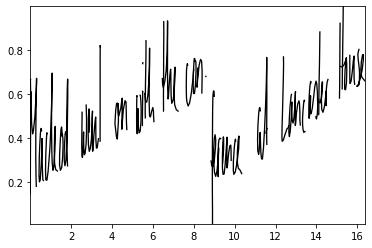

In [51]:
instance = example["gt_list"][0].numpy()
start_points = stroke_recovery.relativefy(instance[:,2])
s = start_points
start_indices = np.argwhere(s==1).astype(int).reshape(-1)
l = np.split(instance[:,0:2], start_indices)

output = []

for item in l:
    if item.shape[0]:
        output.append({"x": item[:,0].tolist(), "y": item[:,1].tolist()})

#print(output)
draw_strokes(output, x_to_y=None)

img = draw_temp(output)
print(img.shape)

In [21]:
path = "./temp"
img = read_img(path)


In [53]:
import dill
dill.dump_session('notebook_env.db')
#dill.load_session('notebook_env.db')

print(output)

[{'x': [0.01306240912526846, 0.01015965174883604, 0.012264507822692394, 0.01903129369020462, 0.02220633439719677, 0.019230173900723457, 0.01175545435398817, 0.007945883087813854, 0.003772871335968375, 0.0004901079810224473], 'y': [0.666893482208252, 0.6681270003318787, 0.6526685357093811, 0.6178354620933533, 0.5613737106323242, 0.44264474511146545, 0.32987046241760254, 0.2275494486093521, 0.15455317497253418, 0.14643330872058868]}, {'x': [0.055695775896310806, 0.053701017051935196, 0.0677093043923378, 0.11653411388397217, 0.15676547586917877, 0.2296895682811737, 0.27983200550079346, 0.30929285287857056, 0.31204643845558167, 0.3029356598854065, 0.2880951464176178, 0.27492618560791016, 0.27235254645347595, 0.28788915276527405, 0.2998577058315277], 'y': [0.6088336110115051, 0.5393094420433044, 0.4683363437652588, 0.4187787175178528, 0.4326508641242981, 0.49636709690093994, 0.5786647796630859, 0.6468724608421326, 0.6709173321723938, 0.6304503679275513, 0.5376994013786316, 0.424796104431152

In [108]:
## DRAW THE IMAGE
#Pillow-simd

# def get_ratio(raw):
#     y_min = min([np.min(x["y"]) for x in stroke_list])
#     y_max = max([max(x["y"]) for x in stroke_list])
#     x_min = min([min(x["x"]) for x in stroke_list])
#     x_max = max([max(x["x"]) for x in stroke_list])

def gt_to_raw(instance):
    start_points = stroke_recovery.relativefy(instance[:,2])
    s = start_points
    start_indices = np.argwhere(s==1).astype(int).reshape(-1)
    l = np.split(instance[:,0:2], start_indices)

    output = []

    for item in l:
        if item.shape[0]:
            output.append({"x": item[:,0].tolist(), "y": item[:,1].tolist()})
    return output

def gt_to_pil_format(instance):
    start_points = stroke_recovery.relativefy(instance[:,2])
    s = start_points
    start_indices = np.argwhere(s==1).astype(int).reshape(-1)
    l = np.split(instance[:,0:2], start_indices)
    return l

def get_x_to_y_from_gt(instance):
    x_max = np.max(instance[:,0])
    x_min = np.min(instance[:,0])
    y_min = np.min(instance[:,1])
    y_max = np.max(instance[:,1])    
    return (x_max-x_min)/(y_max-y_min)

#print(output)
#     draw_strokes(output, x_to_y=None)

#     img = draw_temp(output)
#     print(img.shape)

instance = example["gt_list"][0].numpy()
#gt_to_raw(instance)


def draw_from_raw():
    from PIL import Image, ImageDraw
    height = 60
    width = 500
    img  = Image.new("L", (width, height), 255)
    draw = ImageDraw.Draw(img)

    for line in output:
        coords = zip((np.array(line["x"])*width), (np.array(line["y"])*height))
        coords = list(coords)
        draw.line(coords, fill=0, width=15)

    data = np.array(img)
    #print(np.array(img).shape)

    img = Image.fromarray(data, 'L')
    #img.save('my.png')
    img.show()
